start a Jupyter Notebook using any platform that you are comfortable with and do the following:

Write some markdown to explain that this notebook will be mainly used for the capstone project.
Import the pandas library as pd.
Import the Numpy library as np.
Print the following the statement: Hello Capstone Project Course!
Push the Notebook to your Github repository and submit a link to the notebook on your Github repository.

In [1]:
import pandas as pd 
from datetime import datetime as dt

In [2]:
df = pd.read_csv("Data-Collisions.csv",index_col=None, header=0)

c:\users\rajvi\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [289]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [288]:
data_wrl=df[['INCDTTM','OBJECTID','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','COLLISIONTYPE','SEVERITYDESC','SDOT_COLDESC',"SEVERITYCODE","PERSONCOUNT","ST_COLCODE",'ST_COLDESC','SDOT_COLCODE','JUNCTIONTYPE'
]]
data_wrl.columns

Index(['INCDTTM', 'OBJECTID', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'COLLISIONTYPE', 'SEVERITYDESC', 'SDOT_COLDESC', 'SEVERITYCODE',
       'PERSONCOUNT', 'ST_COLCODE', 'ST_COLDESC', 'SDOT_COLCODE',
       'JUNCTIONTYPE'],
      dtype='object')

#Here I need to drop columns which does not have values because different parameters like road cond can not predict and I have #also seperate the date and time individually for prediction.

In [339]:
data_wrl1=data_wrl.dropna(how='any')

In [138]:
data_wrl1['acc_month'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).month
data_wrl1['acc_year'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).year
data_wrl1['acc_day'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).day
data_wrl1['acc_hour'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).hour
data_wrl1.head()

<ipython-input-138-a8f326d09978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wrl1['acc_month'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).month
<ipython-input-138-a8f326d09978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wrl1['acc_year'] = pd.DatetimeIndex(data_wrl1['INCDTTM']).year
<ipython-input-138-a8f326d09978>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,INCDTTM,OBJECTID,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,SEVERITYDESC,SDOT_COLDESC,SEVERITYCODE,PERSONCOUNT,ST_COLCODE,ST_COLDESC,SDOT_COLCODE,JUNCTIONTYPE,acc_month,acc_year,acc_day,acc_hour
0,3/27/2013 2:54:00 PM,1,Intersection,Overcast,Wet,Daylight,Angles,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",2,2,10,Entering at angle,11,At Intersection (intersection related),3,2013,27,14
1,12/20/2006 6:55:00 PM,2,Block,Raining,Wet,Dark - Street Lights On,Sideswipe,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",1,2,11,From same direction - both going straight - bo...,16,Mid-Block (not related to intersection),12,2006,20,18
2,11/18/2004 10:20:00 AM,3,Block,Overcast,Dry,Daylight,Parked Car,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1,4,32,One parked--one moving,14,Mid-Block (not related to intersection),11,2004,18,10
3,3/29/2013 9:26:00 AM,4,Block,Clear,Dry,Daylight,Other,Property Damage Only Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1,3,23,From same direction - all others,11,Mid-Block (not related to intersection),3,2013,29,9
4,1/28/2004 8:04:00 AM,5,Intersection,Raining,Wet,Daylight,Angles,Injury Collision,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",2,2,10,Entering at angle,11,At Intersection (intersection related),1,2004,28,8


<AxesSubplot:title={'center':'Accidents vs Weather'}, xlabel='Weather', ylabel='Number of Accidents'>

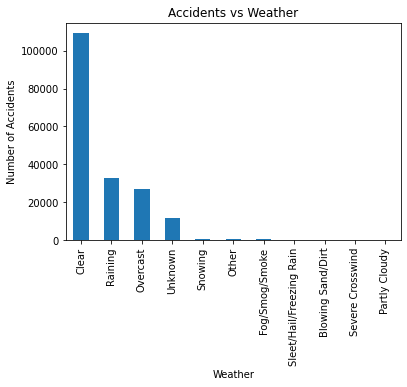

In [340]:
data_weather=data_wrl1['WEATHER'].value_counts().plot(kind='bar')
data_weather.set_title('Accidents vs Weather')
data_weather.set_xlabel('Weather')
data_weather.set_ylabel('Number of Accidents')
data_weather


Here I have focused on imapce with accidents.I also checked accidents impact with Road COndition.I coundnot find any of there factors good for predict anything.

<AxesSubplot:title={'center':'Accidents vs RoadType'}, xlabel='Road COndition'>

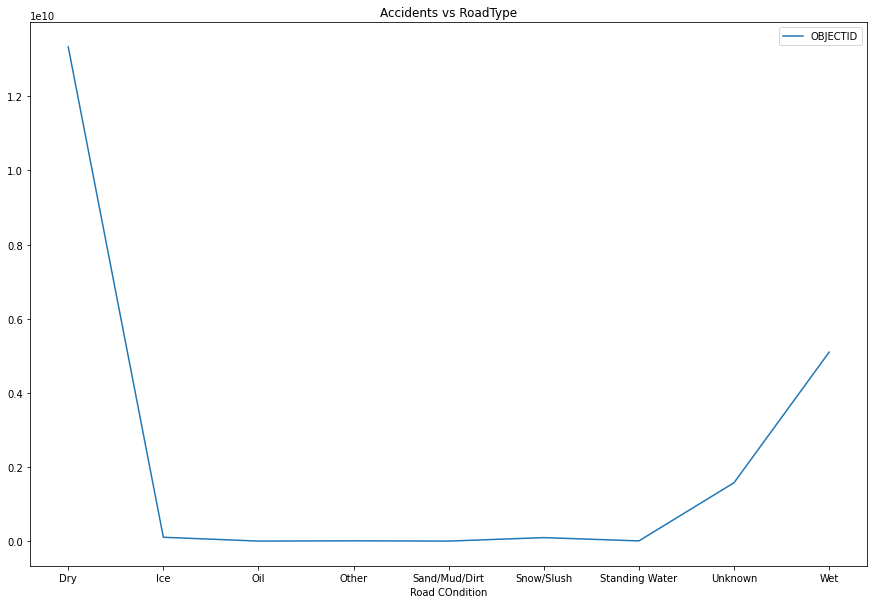

In [341]:
data_accmonth=data_wrl.groupby(['ROADCOND']).sum().plot(kind='line', y='OBJECTID',figsize=(15,10))
data_accmonth.set_title('Accidents vs RoadType')
data_accmonth.set_xlabel('Road COndition')
#data_accmonth.set_ylabel('Number of Accidents')
data_accmonth

Here I have split accidetns by Years. So I can predict which year most of accidents happend.

<AxesSubplot:ylabel='OBJECTID'>

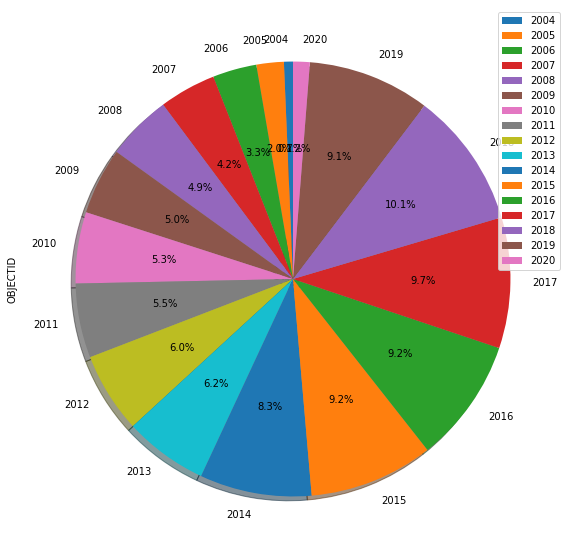

In [189]:
data_accmonth=data_wrl1.groupby(['acc_year']).sum().plot(kind='pie',y='OBJECTID',shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')
data_accmonth

<AxesSubplot:title={'center':'Accidents vs Time'}, xlabel='Hours'>

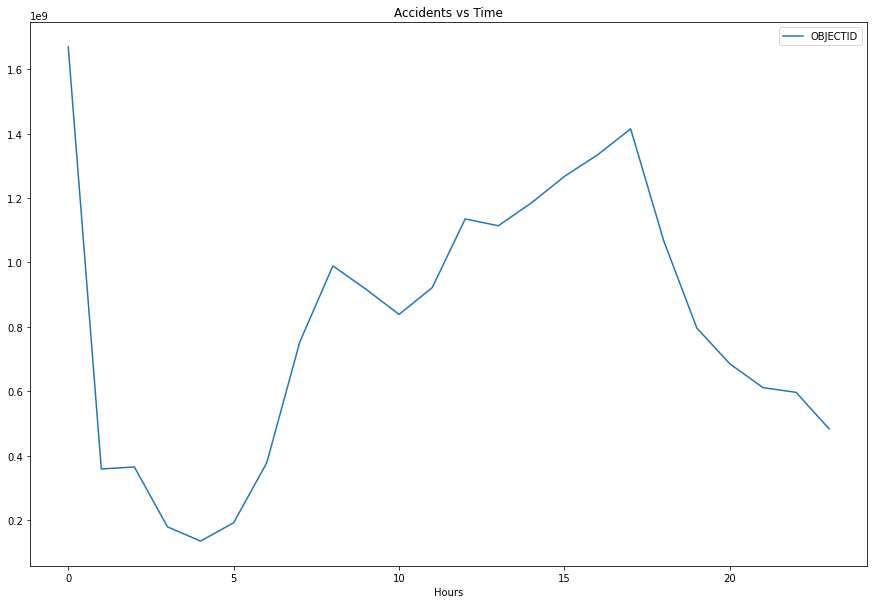

In [197]:
data_accmonth=data_wrl1.groupby(['acc_hour']).sum().plot(kind='line', y='OBJECTID',figsize=(15,10))
data_accmonth.set_title('Accidents vs Time')
data_accmonth.set_xlabel('Hours')
#data_accmonth.set_ylabel('Number of Accidents')
data_accmonth

For checking relationship with time. I also found 0-1 and 12-17 are timing of most of acccidents. 

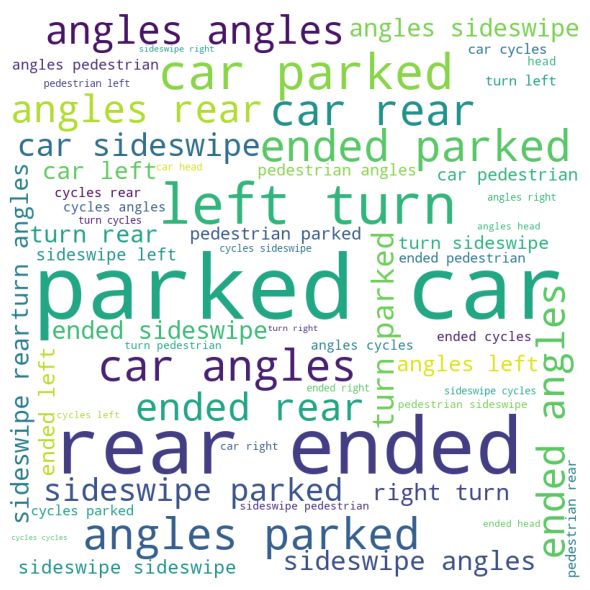

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#text = df.description[0]
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data_wrl1.COLLISIONTYPE: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Here I  found the type of Collisions.

Text(0, 0.5, 'Number of Accidents')

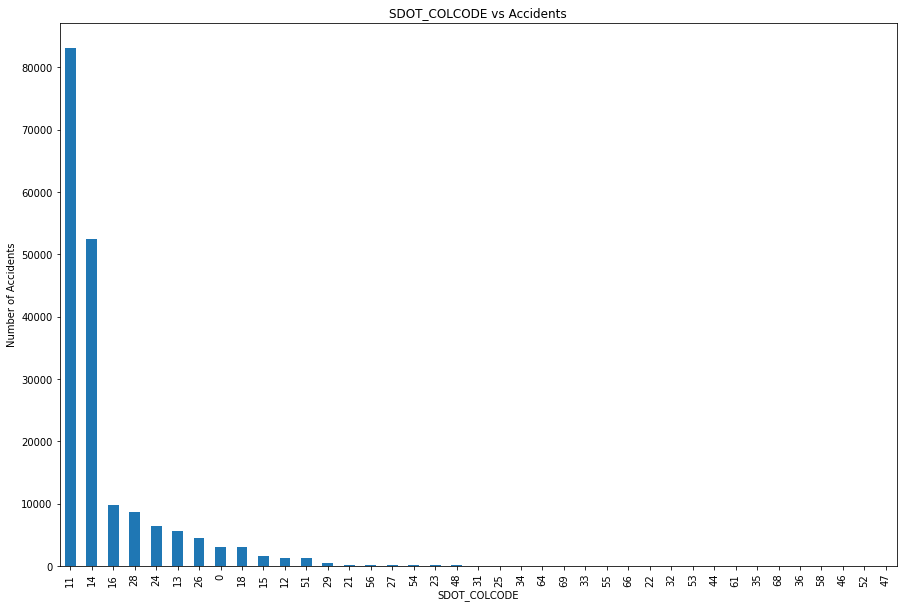

In [202]:
data_weather=data_wrl1['SDOT_COLCODE'].value_counts().plot(kind='bar',figsize=(15,10))
data_weather.set_title('SDOT_COLCODE vs Accidents')
data_weather.set_xlabel('SDOT_COLCODE')
data_weather.set_ylabel('Number of Accidents')
#data_col=data_wrl1.groupby(['SDOT_COLCODE']).sum().plot(kind='bar',figsize=(15,10))
#data_col

This data is interesting for me. If we can conrtol 11 and 14 then we can control most of the accidents.

Text(0, 0.5, 'Number of Accidents')

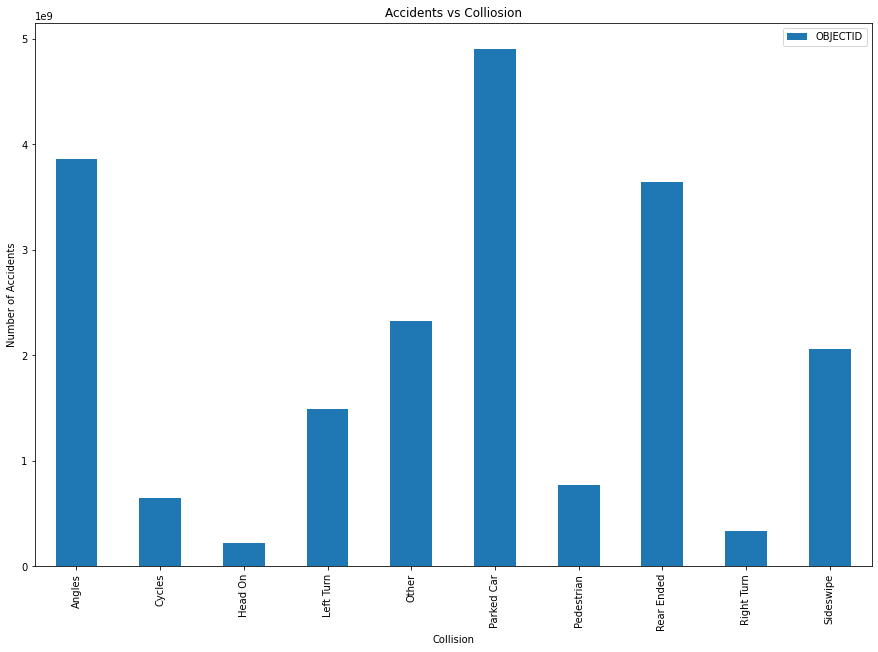

In [221]:
#data_coltype=data_wrl1['COLLISIONTYPE'].
#data_coltype.plot(kind='scatter',figsize=, color='darkblue')
#df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
#plt.show()
#data_coltype.set_title('COLLISIONTYPE vs Accidents')
#data_coltype.set_xlabel('COLLISIONTYPE')
#data_coltype.set_ylabel('Number of Accidents')
#data_coltype
data_coltype=data_wrl.groupby(['COLLISIONTYPE']).sum().plot(kind='bar', y='OBJECTID',figsize=(15,10))
data_coltype.set_title('Accidents vs Colliosion')
data_coltype.set_xlabel('Collision')
data_coltype.set_ylabel('Number of Accidents')

#data_sdotanalyze=data_wrl1[data_wrl1['SDOT_COLCODE']==11]
#data_sdotanalyze_lightcond=data_wrl1.groupby(['COLLISIONTYPE']).sum().plot(kind='bar',figsize=(15,10))
#data_sdotanalyze_lightcond

This is interesting that major accidents happed with aprked cars.

Text(0, 0.5, 'Number of Accidents')

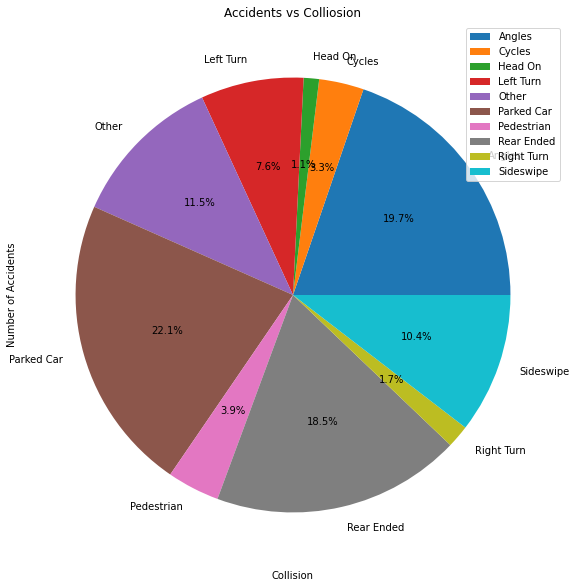

In [277]:
data_sdotanalyze_jun=data_wrl1[data_wrl1['SDOT_COLCODE']==14]
#data_sdotanalyze_lightcond=data_wrl1.groupby(['COLLISIONTYPE']).sum().plot(kind='bar',figsize=(15,10))
#data_sdotanalyze_lightcond

data_sdotanalyze_jun=data_wrl1.groupby(['COLLISIONTYPE']).sum().plot(kind='pie', y='OBJECTID',figsize=(15,10),autopct='%1.1f%%')
data_sdotanalyze_jun.set_title('Accidents vs Colliosion')
data_sdotanalyze_jun.set_xlabel('Collision')
data_sdotanalyze_jun.set_ylabel('Number of Accidents')


Text(0, 0.5, 'Number of Accidents')

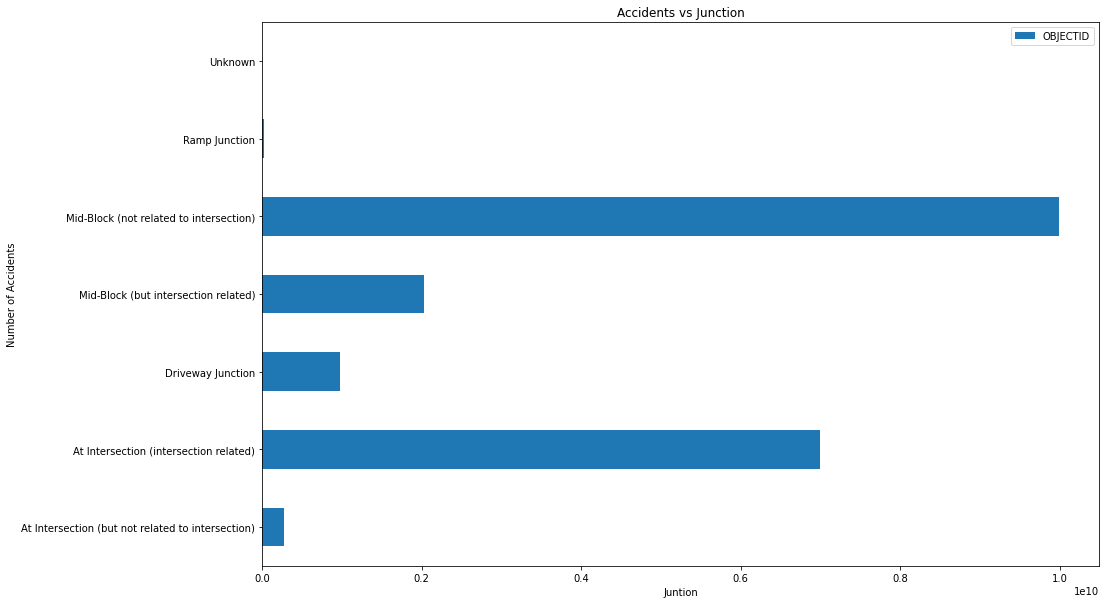

In [284]:
data_sdotanalyze_jun=data_wrl1[data_wrl1['SDOT_COLCODE']==14]

data_sdotanalyze_jun=data_wrl.groupby(['JUNCTIONTYPE']).sum().plot(kind='barh', y='OBJECTID',figsize=(15,10))
data_sdotanalyze_jun.set_title('Accidents vs Junction')
data_sdotanalyze_jun.set_xlabel('Juntion')
data_sdotanalyze_jun.set_ylabel('Number of Accidents')



#data_sdotanalyze_lightcond=data_sdotanalyze_jun.groupby(['JUNCTIONTYPE']).sum().plot(kind='bar',figsize=(15,10))
#data_sdotanalyze_lightcond

<AxesSubplot:xlabel='SDOT_COLCODE'>

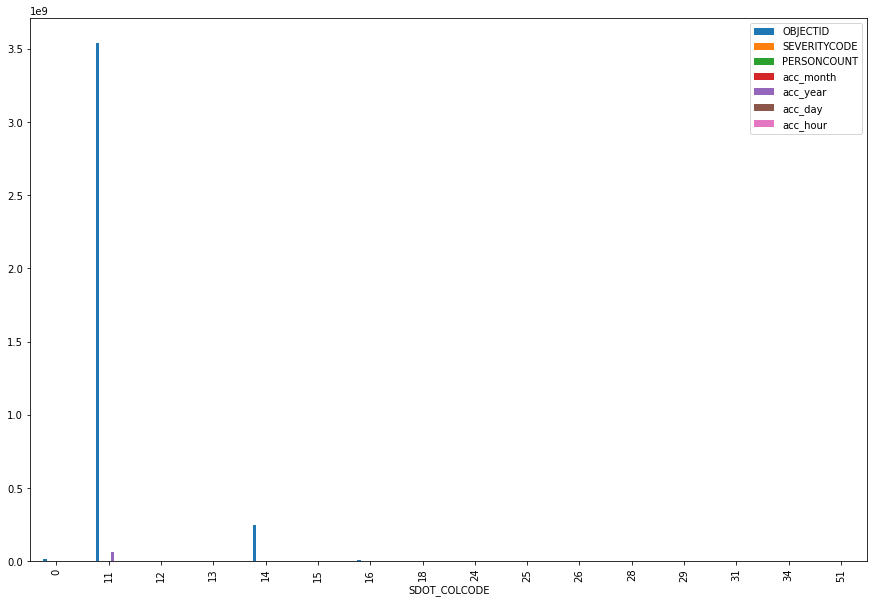

In [337]:
data_sdotanalyze_jun=data_wrl1[data_wrl1['ST_COLDESC']=='Entering at angle']
data_sdotanalyze_lightcond=data_sdotanalyze_jun.groupby(['SDOT_COLCODE']).sum().plot(kind='bar',figsize=(15,10))
data_sdotanalyze_lightcond

Text(0, 0.5, 'Number of Accidents')

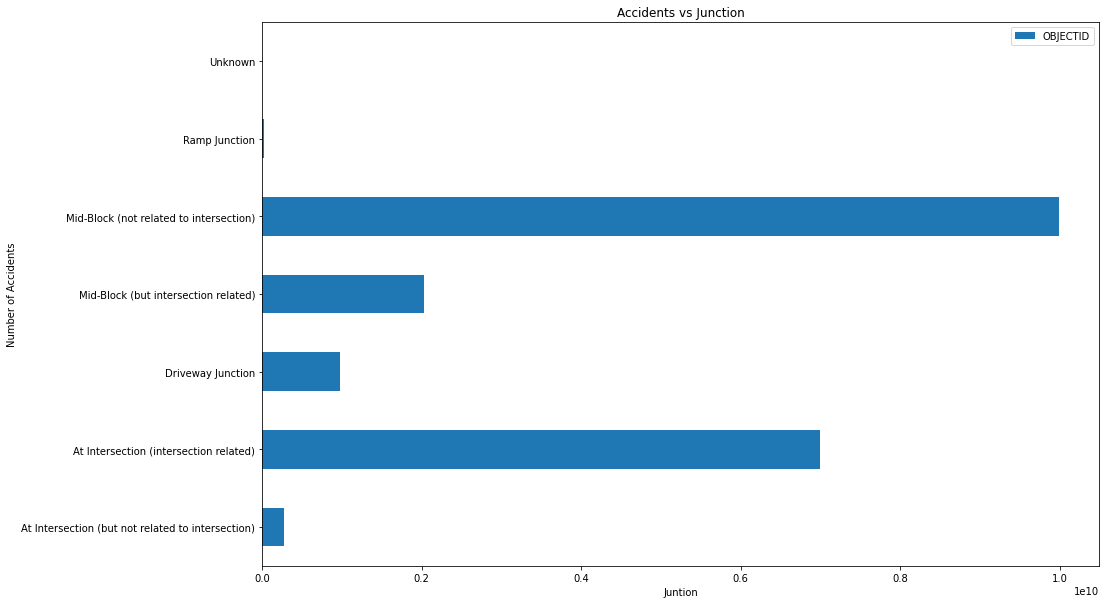

In [338]:
data_sdotanalyze_jun=data_wrl1[data_wrl1['SDOT_COLCODE']==11]
data_sdotanalyze_jun=data_wrl.groupby(['JUNCTIONTYPE']).sum().plot(kind='barh', y='OBJECTID',figsize=(15,10))
data_sdotanalyze_jun.set_title('Accidents vs Junction')
data_sdotanalyze_jun.set_xlabel('Juntion')
data_sdotanalyze_jun.set_ylabel('Number of Accidents')
#data_sdotanalyze_lightcond=data_sdotanalyze_jun.groupby(['ADDRTYPE']).sum().plot(kind='bar',figsize=(15,10))
#data_sdotanalyze_lightcond

<AxesSubplot:xlabel='ADDRTYPE'>

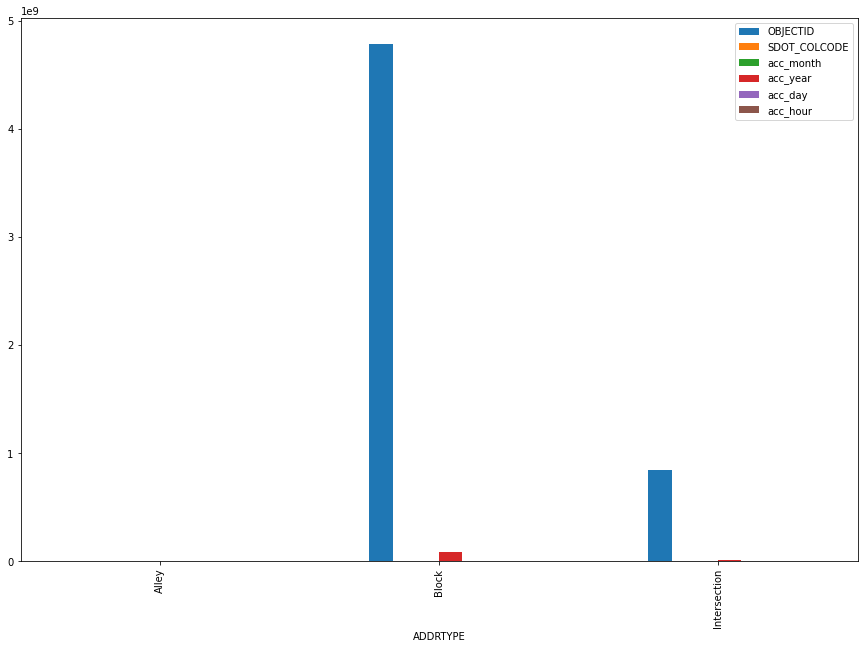

In [84]:
data_sdotanalyze_jun=data_wrl1[data_wrl1['SDOT_COLCODE']==14]
data_sdotanalyze_lightcond=data_sdotanalyze_jun.groupby(['ADDRTYPE']).sum().plot(kind='bar',figsize=(15,10))
data_sdotanalyze_lightcond

In [140]:
data_analyze=data_wrl1[['OBJECTID','SEVERITYCODE','PERSONCOUNT','ST_COLCODE','SDOT_COLCODE','acc_hour','acc_year']]
data_analyze14=data_analyze[data_analyze['SDOT_COLCODE']==14]
data_analyze14

,OBJECTID,SEVERITYCODE,PERSONCOUNT,ST_COLCODE,SDOT_COLCODE,acc_hour,acc_year
2,3,1,4,32,14,10,2004
12,16,1,0,14,14,12,2006
17,23,1,0,14,14,8,2004
18,24,2,4,14,14,14,2020
20,26,2,3,14,14,20,2013
...,...,...,...,...,...,...,...
194658,219528,1,3,14,14,21,2019
194661,219532,2,2,29,14,17,2019
194662,219535,1,2,32,14,17,2018
194669,219544,1,2,13,14,9,2018


In [ ]:
from sklearn import preprocessing
%matplotlib inline

X=data_analyze14
y=data_analyze14["acc_hour"].values
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (41988, 7) (41988,)
Test set: (10498, 7) (10498,)


For1 Test set Accuracy:  0.8958849304629454
For2 Test set Accuracy:  0.8655934463707373
For3 Test set Accuracy:  0.8466374547532863
For4 Test set Accuracy:  0.8445418174890456
For5 Test set Accuracy:  0.8413983615926843
For6 Test set Accuracy:  0.8254905696323109
For7 Test set Accuracy:  0.8229186511716517
For8 Test set Accuracy:  0.8132977710040008
For9 Test set Accuracy:  0.8057725281005906


Text(0, 0.5, 'Accuracy Level')

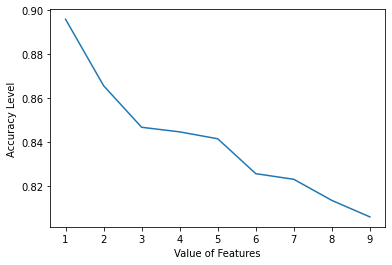

In [161]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics 
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
%matplotlib inline

scores=[]
Krange=range(1,10)
for k in Krange:
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    knn = neigh.predict(X_test)
    values = metrics.accuracy_score(y_test, knn)
    print("For"+str(k)+" Test set Accuracy: ", values)
    scores.append(values)
plt.plot(Krange,scores)
plt.xlabel('Value of Features')
plt.ylabel('Accuracy Level')

In [291]:
neighbour = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
yhat = neighbour.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbour.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.889635133847766
Test set Accuracy:  0.8229186511716517


In [307]:
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
minDepth=3
maxDepth=15
listVal=[]
rangeD = range(minDepth,maxDepth)
for m in rangeD:
    LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    LoanTree.fit(X_trainset,y_trainset)
    predTree = LoanTree.predict(X_testset)
    values=metrics.accuracy_score(y_testset, predTree)
    print("DecisionTrees's Accuracy: ", values)
    listVal.append(values)

DecisionTrees's Accuracy:  0.5281976374952368
DecisionTrees's Accuracy:  0.8372285024768195
DecisionTrees's Accuracy:  0.9512892163089038
DecisionTrees's Accuracy:  0.9953003937507938
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0
DecisionTrees's Accuracy:  1.0


In [308]:
print('Max Value of accuracy:',max(listVal))

Max Value of accuracy: 1.0


In [309]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhatSVM = clf.predict(X_test)
yhatSVM[0:5]

array([16, 10, 18, 19,  8], dtype=int64)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1620
           1       0.94      0.89      0.91       156
           2       0.73      0.93      0.82       187
           3       0.39      0.15      0.22        73
           4       0.42      0.21      0.28        53
           5       0.30      0.10      0.15        87
           6       0.66      0.86      0.75       152
           7       0.96      0.97      0.96       394
           8       0.94      0.99      0.96       513
           9       0.97      0.97      0.97       411
          10       0.99      0.97      0.98       396
          11       0.99      0.96      0.97       456
          12       0.96      0.98      0.97       561
          13       0.98      0.97      0.97       625
          14       0.97      0.98      0.97       639
          15       0.98      0.98      0.98       649
          16       0.95      1.00      0.98       767
          17       0.98    

0.9267067258617593

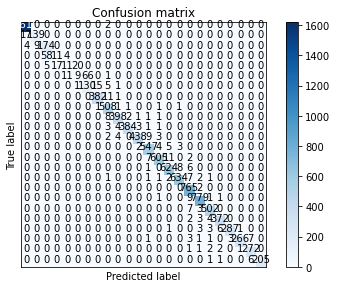

In [313]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhatSVM)
np.set_printoptions(precision=2)

print(classification_report(y_test, yhatSVM))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[],normalize= False,  title='Confusion matrix')

f1_score(y_test, yhatSVM, average='weighted')

jaccard_score(y_test, yhatSVM, average='weighted')

In [296]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (41988, 7) (41988,)
Test set: (10498, 7) (10498,)


1C Values: 0.1        Solver: newton-cg          Accuracy: 1.4576817493512984
2C Values: 0.01        Solver: newton-cg          Accuracy: 1.9292426967964829
3C Values: 0.001        Solver: newton-cg          Accuracy: 2.361239681551772


c:\users\rajvi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4C Values: 0.1        Solver: lbfgs          Accuracy: 1.457609606140874
5C Values: 0.01        Solver: lbfgs          Accuracy: 1.9292393558075318
6C Values: 0.001        Solver: lbfgs          Accuracy: 2.36123914513398
7C Values: 0.1        Solver: liblinear          Accuracy: 2.1253911996531754
8C Values: 0.01        Solver: liblinear          Accuracy: 2.32037290972155
9C Values: 0.001        Solver: liblinear          Accuracy: 2.6867910747171826


c:\users\rajvi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


10C Values: 0.1        Solver: sag          Accuracy: 1.4584424799454403
11C Values: 0.01        Solver: sag          Accuracy: 1.929242709347275
12C Values: 0.001        Solver: sag          Accuracy: 2.361233132382368


c:\users\rajvi\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


13C Values: 0.1        Solver: saga          Accuracy: 1.4698972799029546
14C Values: 0.01        Solver: saga          Accuracy: 1.9293107560234717
15C Values: 0.001        Solver: saga          Accuracy: 2.3611963507752107
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1.4576817493512984, 1.9292426967964829, 2.361239681551772, 1.457609606140874, 1.9292393558075318, 2.36123914513398, 2.1253911996531754, 2.32037290972155, 2.6867910747171826, 1.4584424799454403, 1.929242709347275, 2.361233132382368, 1.4698972799029546, 1.9293107560234717, 2.3611963507752107]


Text(0, 0.5, 'Testing Accuracy')

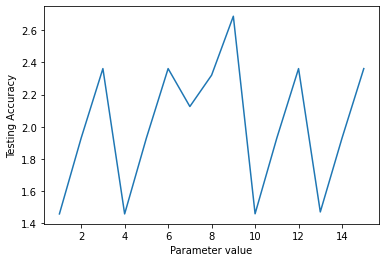

In [297]:
c_values=[0.1,0.01,0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores=[]
c=[]
m=0
v=[]
s=[]
for i in solver_list:
    for k in c_values:
        LR = LogisticRegression(C=k, solver=i).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)
        print(str(m+1)+"C Values: "+str(k)+"        Solver: "+i+"          Accuracy: "+str(log_loss(y_test, yhat_prob)))
        m=m+1
        scores.append(log_loss(y_test, yhat_prob))
        v.append(m)
        s.append(i)
        c.append(k)
print(v)
print(scores)
plt.plot(v, scores)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')

In [299]:
a=scores.index(max(scores))
LR1 = LogisticRegression(C=c[a], solver=s[a]).fit(X_train,y_train)
LR1
yhat1 = LR1.predict(X_test)
yhat_prob1 = LR1.predict_proba(X_test)
print("Max Accuracy: "+str(log_loss(y_test, yhat_prob1)))
       

Max Accuracy: 2.6867910747171826


In [315]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [329]:
from sklearn.metrics import f1_score
dt_yhat = LoanTree.predict(X_test)
svm_yhat = clf.predict(X_test)
lr_yhat = LR.predict(X_test)
fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)
fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)
fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.8, 1.0, 0.95, 0.15]

In [330]:
lr_prob = LR.predict_proba(X_test)
list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, lr_prob), 2)]
list_ll

['NA', 'NA', 'NA', 2.36]

In [335]:
df = pd.DataFrame(list_fs, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.80,0.80,NA
Decision Tree,1.00,1.00,NA
SVM,0.95,0.95,NA
Logistic Regression,0.15,0.15,2.36
